In [8]:
import pandas as pd
import numpy as np
from pandas_datareader import data as web

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

### lets go back a few years for the data

In [17]:
data = pd.read_csv("resources/final_sandp.csv")

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 3 columns):
Symbol    478 non-null object
Name      478 non-null object
Sector    478 non-null object
dtypes: object(3)
memory usage: 11.3+ KB


In [21]:
tickers = list(data["Symbol"])

In [23]:
tickers.append("^GSPC")

In [30]:
workingData = pd.DataFrame()
for t in tickers:
    workingData[t] = web.DataReader(t, data_source="yahoo", start = "2016-1-1")["Adj Close"]

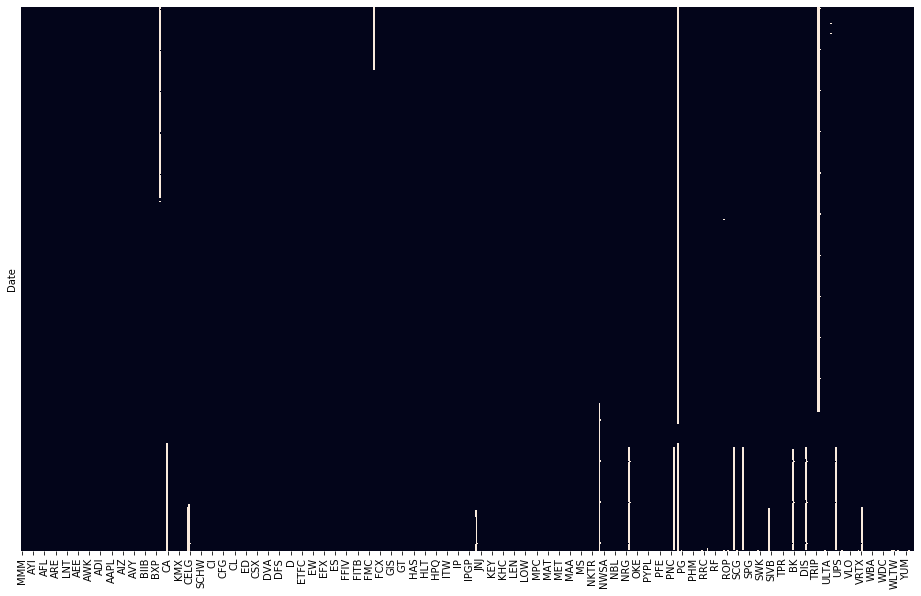

In [36]:
plt.figure(figsize=(16,10))
sns.heatmap(workingData.isnull(), yticklabels=False, cbar=False)

In [41]:
final_Data = workingData.dropna(axis = 1)

In [43]:
final_Data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1074 entries, 2016-01-04 to 2020-04-08
Columns: 445 entries, MMM to ^GSPC
dtypes: float64(445)
memory usage: 3.7 MB


In [45]:
daily_returns = pd.DataFrame()
for t in tickers:
    daily_returns[f"{t} daily returns"] = workingData[f"{t}"].pct_change()

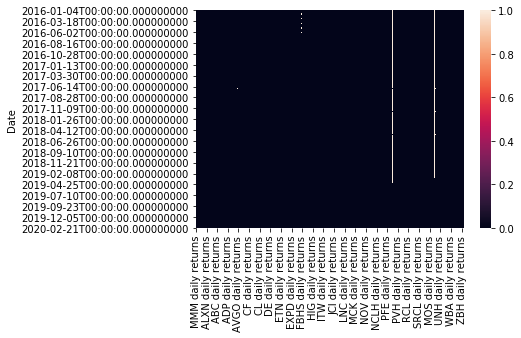

In [47]:
sns.heatmap(daily_returns.isnull())

In [50]:
final_returns = daily_returns.dropna()

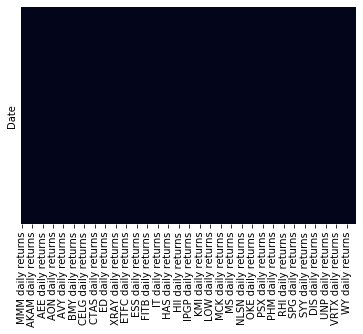

In [53]:
sns.heatmap(final_returns.isnull(),yticklabels=False, cbar=False)

In [54]:
returns_Corr = final_returns.corr()
returns_Corr

,MMM daily returns,AOS daily returns,ABT daily returns,ABBV daily returns,ACN daily returns,ATVI daily returns,AYI daily returns,ADBE daily returns,AAP daily returns,AMD daily returns,...,WYNN daily returns,XEL daily returns,XRX daily returns,XLNX daily returns,XYL daily returns,YUM daily returns,ZBH daily returns,ZION daily returns,ZTS daily returns,^GSPC daily returns
MMM daily returns,1.000000,0.536095,0.656804,0.518070,0.640497,0.371968,0.562776,0.506339,0.514393,0.533430,...,0.453571,0.474452,0.509171,0.689968,0.665861,0.517613,0.509598,0.612706,0.550440,0.721658
AOS daily returns,0.536095,1.000000,0.530344,0.405190,0.484490,0.424080,0.468877,0.490635,0.490474,0.456575,...,0.481229,0.441595,0.402217,0.520600,0.590247,0.329621,0.318845,0.569336,0.452033,0.608453
ABT daily returns,0.656804,0.530344,1.000000,0.594150,0.761097,0.503394,0.560007,0.645477,0.536331,0.529366,...,0.358160,0.747886,0.465044,0.524163,0.720632,0.572012,0.529749,0.615341,0.761352,0.832150
ABBV daily returns,0.518070,0.405190,0.594150,1.000000,0.621819,0.456385,0.514340,0.580042,0.449900,0.473234,...,0.425676,0.465777,0.481277,0.425394,0.590673,0.433504,0.482936,0.541958,0.566071,0.690091
ACN daily returns,0.640497,0.484490,0.761097,0.621819,1.000000,0.570951,0.635600,0.783230,0.576347,0.642664,...,0.527878,0.658035,0.636234,0.581963,0.745152,0.668228,0.656430,0.654526,0.744170,0.897505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM daily returns,0.517613,0.329621,0.572012,0.433504,0.668228,0.193187,0.554566,0.432676,0.544838,0.433450,...,0.539126,0.509003,0.600772,0.361864,0.556505,1.000000,0.706693,0.448197,0.684872,0.679127
ZBH daily returns,0.509598,0.318845,0.529749,0.482936,0.656430,0.251784,0.557544,0.437289,0.435760,0.423481,...,0.562206,0.337540,0.645884,0.321225,0.526056,0.706693,1.000000,0.496039,0.595308,0.648440
ZION daily returns,0.612706,0.569336,0.615341,0.541958,0.654526,0.417582,0.594931,0.589703,0.560909,0.551175,...,0.559733,0.467080,0.592496,0.565193,0.688116,0.448197,0.496039,1.000000,0.561455,0.763907
ZTS daily returns,0.550440,0.452033,0.761352,0.566071,0.744170,0.454731,0.586667,0.606944,0.566848,0.583349,...,0.513692,0.668172,0.589052,0.468737,0.683666,0.684872,0.595308,0.561455,1.000000,0.818631


In [57]:
corr_to_SandP = returns_Corr.corrwith(returns_Corr["^GSPC daily returns"])

In [62]:
corr_to_SandP.sort_values(ascending =False).head(60)

^GSPC daily returns    1.000000
AMP daily returns      0.982989
WFC daily returns      0.976943
BLK daily returns      0.975197
AAPL daily returns     0.972353
L daily returns        0.971155
MSFT daily returns     0.971098
ACN daily returns      0.970746
ROP daily returns      0.970082
PYPL daily returns     0.969965
V daily returns        0.969697
MET daily returns      0.969205
ADP daily returns      0.969203
GRMN daily returns     0.969179
IBM daily returns      0.968444
XYL daily returns      0.968421
MNST daily returns     0.967501
SNPS daily returns     0.965194
NSC daily returns      0.963989
GD daily returns       0.962536
MCO daily returns      0.961770
IVZ daily returns      0.959258
CTSH daily returns     0.959005
PNC daily returns      0.958899
MA daily returns       0.958307
GOOGL daily returns    0.957971
USB daily returns      0.957172
AME daily returns      0.957042
MS daily returns       0.956259
JPM daily returns      0.955070
EL daily returns       0.954990
FIS dail

In [73]:
final_returns.head()

,MMM daily returns,AOS daily returns,ABT daily returns,ABBV daily returns,ACN daily returns,ATVI daily returns,AYI daily returns,ADBE daily returns,AAP daily returns,AMD daily returns,...,WYNN daily returns,XEL daily returns,XRX daily returns,XLNX daily returns,XYL daily returns,YUM daily returns,ZBH daily returns,ZION daily returns,ZTS daily returns,^GSPC daily returns
Date,,,,,,,,,,,,,,,,,,,,,
2019-04-16,0.004958,0.006296,-0.014452,-0.010120,-0.001339,-0.015082,-0.017194,-0.002902,-0.008157,0.021954,...,0.020449,-0.016493,0.013611,0.006863,0.006962,-0.000098,-0.018608,0.012801,-0.020640,0.000509
2019-04-17,0.003412,0.001073,-0.045823,-0.027802,-0.000614,-0.001775,-0.003739,-0.007295,-0.017449,-0.015754,...,-0.009398,-0.001641,-0.009429,0.006223,0.004003,-0.001279,-0.046447,0.002072,-0.010363,-0.002274
2019-04-18,0.005697,0.008750,0.014270,-0.005258,-0.001900,0.007337,0.008568,0.004157,-0.007975,0.006912,...,-0.006417,-0.001643,-0.003173,-0.006406,0.001933,0.017931,0.002590,-0.021919,0.010716,0.001579
2019-04-22,-0.001553,-0.007081,0.007982,0.007477,-0.003023,0.000662,0.010812,0.006061,-0.030331,0.018064,...,-0.017130,0.001829,-0.021701,-0.003779,0.006753,-0.001355,0.010000,-0.012473,0.011007,0.001012
2019-04-23,0.004393,0.003387,0.021339,0.006526,0.013534,0.025805,0.016252,0.023070,0.014052,-0.007452,...,0.020714,0.007302,0.011239,0.020158,-0.005031,-0.002520,0.012871,0.045601,0.018478,0.008841


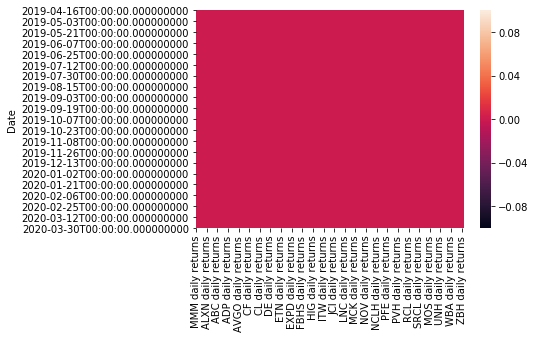

In [76]:
sns.heatmap(final_returns.isnull())

In [92]:
daily_returns

,MMM daily returns,AOS daily returns,ABT daily returns,ABBV daily returns,ACN daily returns,ATVI daily returns,AYI daily returns,ADBE daily returns,AAP daily returns,AMD daily returns,...,WYNN daily returns,XEL daily returns,XRX daily returns,XLNX daily returns,XYL daily returns,YUM daily returns,ZBH daily returns,ZION daily returns,ZTS daily returns,^GSPC daily returns
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,0.004359,-0.005587,-0.000233,-0.004166,0.005205,-0.012759,0.012692,0.004023,-0.006831,-0.007220,...,0.018903,0.010084,-0.001942,0.014847,-0.000277,-0.002493,0.020823,-0.010857,0.015655,0.002012
2016-01-06,-0.020141,-0.019797,-0.008388,0.000174,-0.001954,-0.009424,-0.026379,-0.014295,-0.026455,-0.087273,...,-0.051805,0.010538,-0.012646,-0.018287,-0.012476,-0.007080,0.004330,-0.029145,0.000208,-0.013115
2016-01-07,-0.024362,-0.048854,-0.023966,-0.002963,-0.029366,-0.014134,-0.026529,-0.020984,0.011073,-0.091633,...,-0.094070,0.003842,-0.027586,-0.039448,-0.025828,-0.034117,-0.022993,-0.030019,-0.030404,-0.023700
2016-01-08,-0.003405,-0.035581,-0.020944,-0.027268,-0.009681,-0.015440,-0.037348,-0.014140,-0.021971,-0.061403,...,-0.040704,-0.010935,-0.028369,-0.020534,-0.009510,-0.013607,-0.004217,-0.011254,-0.014605,-0.010838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-02,0.035827,0.009267,0.037482,0.023291,0.010279,0.057043,-0.049306,0.009130,-0.008523,0.019011,...,-0.024630,0.040289,0.050000,0.032077,0.060733,-0.023651,0.034364,0.002765,0.036723,0.022829
2020-04-03,-0.029875,-0.001948,0.000126,-0.023426,-0.026365,-0.013162,-0.021501,-0.034051,-0.042529,-0.042706,...,-0.079172,-0.042370,-0.085498,-0.000884,-0.045741,-0.041635,-0.007550,-0.027964,-0.012238,-0.015137
2020-04-06,0.051648,0.065514,0.041284,0.032166,0.091357,0.027009,0.110934,0.086918,0.131837,0.115755,...,0.169691,0.056861,0.107101,0.070435,0.077521,0.113744,0.064450,0.091167,0.106273,0.070331


#### ets check the volatility of each secutiry

In [103]:
del vol

In [107]:
vol = []
for x in final_returns.columns:
    vol.append(final_returns[f"{x}"].std() * np.sqrt(252))

In [109]:
len(vol)

479

In [110]:
mean_daily = []
for x in final_returns.columns:
    mean_daily.append(final_returns[f"{x}"].mean() * 252)

In [113]:
mean_daily[0:10]

[-0.27790484384349967,
 -0.24785647787972337,
 0.15793250466897607,
 0.09630053711581792,
 0.020936070365900884,
 0.37398125479630445,
 -0.34794074664504515,
 0.24531904218834574,
 -0.47394055627721043,
 0.750124712135844]

In [117]:
ss = pd.read_csv("resources/final_sandp.csv")

In [118]:
ss

,Symbol,Name,Sector
0,MMM,3M Company,Industrials
1,AOS,A.O. Smith Corp,Industrials
2,ABT,Abbott Laboratories,Health Care
3,ABBV,AbbVie Inc.,Health Care
4,ACN,Accenture plc,Information Technology
...,...,...,...
473,XYL,Xylem Inc.,Industrials
474,YUM,Yum! Brands Inc,Consumer Discretionary
475,ZBH,Zimmer Biomet Holdings,Health Care
476,ZION,Zions Bancorp,Financials


In [119]:
symbol_to_company = dict(list(zip(ss["Symbol"], ss["Name"])))

In [143]:
symbol_to_company["^GSPC"] = "Sandp500"

In [144]:
symbol_to_company

{'MMM': '3M Company',
 'AOS': 'A.O. Smith Corp',
 'ABT': 'Abbott Laboratories',
 'ABBV': 'AbbVie Inc.',
 'ACN': 'Accenture plc',
 'ATVI': 'Activision Blizzard',
 'AYI': 'Acuity Brands Inc',
 'ADBE': 'Adobe Systems Inc',
 'AAP': 'Advance Auto Parts',
 'AMD': 'Advanced Micro Devices Inc',
 'AES': 'AES Corp',
 'AMG': 'Affiliated Managers Group Inc',
 'AFL': 'AFLAC Inc',
 'A': 'Agilent Technologies Inc',
 'APD': 'Air Products & Chemicals Inc',
 'AKAM': 'Akamai Technologies Inc',
 'ALK': 'Alaska Air Group Inc',
 'ALB': 'Albemarle Corp',
 'ARE': 'Alexandria Real Estate Equities Inc',
 'ALXN': 'Alexion Pharmaceuticals',
 'ALGN': 'Align Technology',
 'ALLE': 'Allegion',
 'AGN': 'Allergan, Plc',
 'ADS': 'Alliance Data Systems',
 'LNT': 'Alliant Energy Corp',
 'ALL': 'Allstate Corp',
 'GOOGL': 'Alphabet Inc Class A',
 'GOOG': 'Alphabet Inc Class C',
 'MO': 'Altria Group Inc',
 'AMZN': 'Amazon.com Inc.',
 'AEE': 'Ameren Corp',
 'AAL': 'American Airlines Group',
 'AEP': 'American Electric Power',


In [134]:
ticker_series = pd.Series(workingData.columns)

In [136]:
volatility_series = pd.Series(vol)

In [139]:
av_return_Series = pd.Series(mean_daily)

In [141]:
main_data = pd.concat([ticker_series, volatility_series,av_return_Series],axis=1)
main_data.columns = ["symbol", "vol", "avg daily return"]

In [147]:
main_data["company"] = main_data["symbol"].apply(lambda x: symbol_to_company[x])

In [149]:
symbol_to_sector = dict(list(zip(ss["Symbol"], ss["Sector"])))

In [151]:
symbol_to_sector["^GSPC"] = "Index"

In [152]:
main_data["sector"] = main_data["symbol"].apply(lambda x: symbol_to_sector[x])

In [156]:
main_data.sort_values("vol", ascending = False)

,symbol,vol,avg daily return,company,sector
231,IR,3.456016,1.785363,Ingersoll-Rand PLC,Industrials
185,FLR,1.163247,-1.111413,Fluor Corp.,Industrials
343,PCG,1.160881,-0.123706,PG&E Corp.,Utilities
46,APA,1.046734,-0.970531,Apache Corporation,Energy
323,NCLH,0.939438,-1.176262,Norwegian Cruise Line,Consumer Discretionary
...,...,...,...,...,...
437,UNH,0.118008,0.158129,United Health Group Inc.,Health Care
421,TMO,0.116743,0.101987,Thermo Fisher Scientific,Health Care
90,CELG,0.107857,0.137380,Celgene Corp.,Health Care
78,CA,0.104311,-0.122445,"CA, Inc.",Information Technology


In [154]:
main_data.to_csv("resources/maindata.csv")